In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore')

## loading the data

In [2]:
pd.pandas.set_option('display.max_columns', None)
# loading the original data set
data = pd.read_csv('housesData.csv')
# loading the prepressed train set
train_set=pd.read_csv('train_set.csv')
# loading the prepressed test set
test_set=pd.read_csv('test_set.csv')


In [3]:
# split the data 
from CUNY import Train_Test_Split
XX_train, XX_test, y_train, y_test = Train_Test_Split(train_set,train_set,['SalePrice'])

## Step 1: Load your data, including testing/training split from Project 1.

- Your testing and training split should be balanced
- Your data should be clean and missing data should be addressed
- All appropriate variables are converted to categorical variables (as ordinal or one hot)
- Any necessary feature scaling should be performed
- YOU SHOULD ONLY WORK ON YOUR TRAINING SET

## Step 2: PCA for feature selection

- #### Show how many features do you need to retain to capture 95% of the variance


To answer the above question I wrote the function below. The function takes 2 arguments a dataframe and the desired variance we want to keep. 
 - The function displays the closest possible variance to the desired one
 - The number of features we need to retain to capture the desired variance
 - The list of features we need to keep 
 - and finally, Plotting the PCA importances

 


The possible Explained Varriance    0.95                               
Number of Features                  56                                 


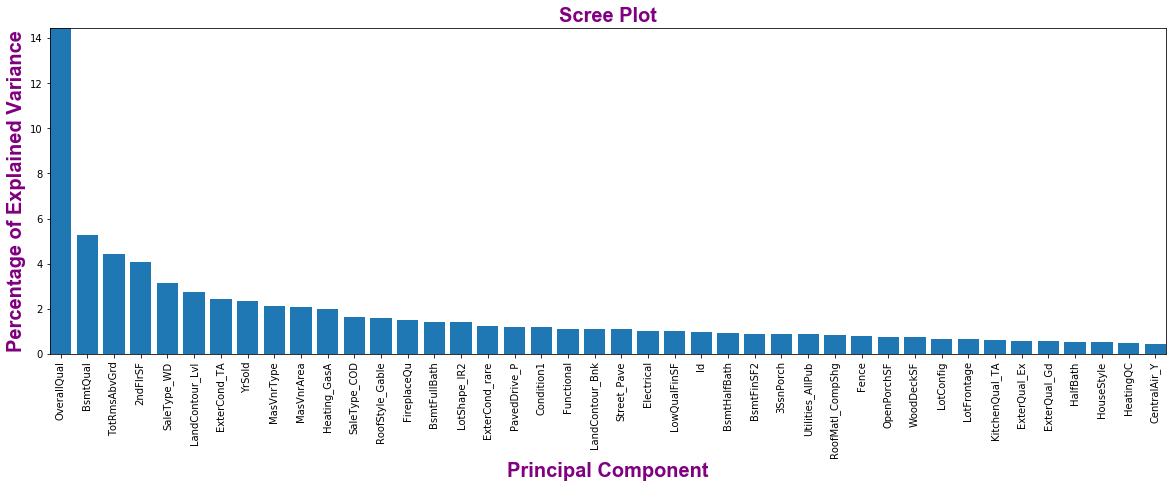

{'PC1': 'OverallQual',
 'PC10': 'MasVnrType',
 'PC11': 'MasVnrArea',
 'PC12': 'Heating_GasA',
 'PC13': 'ExterQual_Ex',
 'PC14': 'SaleType_COD',
 'PC15': 'SaleType_COD',
 'PC16': 'RoofStyle_Gable',
 'PC17': 'FireplaceQu',
 'PC18': 'BsmtFullBath',
 'PC19': 'LotShape_IR2',
 'PC2': 'BsmtQual',
 'PC20': 'PavedDrive_P',
 'PC21': 'Condition1',
 'PC22': 'Street_Pave',
 'PC23': 'ExterCond_rare',
 'PC24': 'PavedDrive_P',
 'PC25': 'Condition1',
 'PC26': 'Functional',
 'PC27': 'Electrical',
 'PC28': 'LandContour_Bnk',
 'PC29': 'Street_Pave',
 'PC3': 'BsmtQual',
 'PC30': 'Id',
 'PC31': 'Electrical',
 'PC32': 'Electrical',
 'PC33': 'LowQualFinSF',
 'PC34': 'WoodDeckSF',
 'PC35': 'Id',
 'PC36': 'BsmtFinSF2',
 'PC37': 'BsmtHalfBath',
 'PC38': 'BsmtFinSF2',
 'PC39': '3SsnPorch',
 'PC4': 'TotRmsAbvGrd',
 'PC40': 'Utilities_AllPub',
 'PC41': 'RoofMatl_CompShg',
 'PC42': 'Fence',
 'PC43': 'OpenPorchSF',
 'PC44': 'WoodDeckSF',
 'PC45': 'LotFrontage',
 'PC46': 'HouseStyle',
 'PC47': 'LotConfig',
 'PC48': 'L

In [4]:
def PCA_Explaind_Variance(df,Explaind_Variance):
    from pprint import pprint
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA 
  
    np.random.seed(0)
    
    scaled=StandardScaler().fit_transform(df)
    pca=PCA(Explaind_Variance)
    pca.fit_transform(scaled)
    variance=round(pca.explained_variance_ratio_.sum(),2)
    Num_feat=pca.n_components_
    print('')
    print('{:35.35}'.format('The possible Explained Varriance'),'{:35.25}'.format(str(variance)))
    print('{:35.35}'.format('Number of Features'),'{:35.25}'.format(str(Num_feat)))
 
    #construnct a PCA model with the n_components given by the desired variance from above
    model = PCA(n_components=Num_feat).fit(scaled)
    # get the index of the most important feature on EACH component i.e. largest absolute value
    most_important = [np.abs(model.components_[i]).argmax() for i in range(Num_feat)]
    initial_feature_names = df.columns
    most_important_names = [initial_feature_names[most_important[i]] for i in range(Num_feat)] 
    dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(Num_feat)}
    
    features = []
    num = []
    for i in range(Num_feat):
        if i not in features:
            features.append(initial_feature_names[most_important[i]])
            num.append(model.explained_variance_ratio_[i])
            
    d = dict(zip(features, num))

    num_num=[]
    featt=[]
    for feature, value in sorted(d.items(), key=lambda item: item[1], reverse=True):
        num_num.append(value)
        featt.append(feature)
        
    rounded=[]
    for item in num_num:
        rounded.append(np.round(item*100, decimals=2))
        
    labels = featt
    font = {'fontname':'Arial', 'size':'20', 'color':'purple', 'weight':'bold'}
    plt.figure(figsize=(20,6)) 
    plt.xticks(rotation=90)
    plt.margins(0)
    plt.bar(x=range(1,len(rounded)+1), height=rounded, tick_label=labels)
    plt.ylabel('Percentage of Explained Variance',**font)
    plt.xlabel('Principal Component',**font)
    plt.title('Scree Plot', **font)
    plt.show()
    pprint( dic)
    return featt

pca_best_features=PCA_Explaind_Variance(XX_train,0.95)

In [5]:
# to Show how many features do we need to retain to capture 95% of the variance,
# im going to pass in 0.95 to the PCA_Explaind_Variance function
# PCA_Explaind_Variance(train_set,0.60)

### From the above results, to capture 95% of the variance we need to retain 67 features.

In [6]:
# DROP ALL OTHER FEATURES--KEEP ANLY THE FEATURES THAT RETAIN 95 %OF THE VARIANCE
XX_train=XX_train[pca_best_features]
XX_test=XX_test[pca_best_features]

In [7]:
XX_train.head()

,OverallQual,BsmtQual,TotRmsAbvGrd,2ndFlrSF,SaleType_WD,LandContour_Lvl,ExterCond_TA,YrSold,MasVnrType,MasVnrArea,Heating_GasA,SaleType_COD,RoofStyle_Gable,FireplaceQu,BsmtFullBath,LotShape_IR2,ExterCond_rare,PavedDrive_P,Condition1,Functional,LandContour_Bnk,Street_Pave,Electrical,LowQualFinSF,Id,BsmtHalfBath,BsmtFinSF2,3SsnPorch,Utilities_AllPub,RoofMatl_CompShg,Fence,OpenPorchSF,WoodDeckSF,LotConfig,LotFrontage,KitchenQual_TA,ExterQual_Ex,ExterQual_Gd,HalfBath,HouseStyle,HeatingQC,CentralAir_Y
0,5.724595,0,2.528459,0,0,1,1,2007,0,0,1,0,0,0,0,0,0,0,2,4,0,1,0,0,619,0,0,0,1,1,1,108,0,1,-0.000000,0,1,0,0,4,4,1
1,3.575684,0,1.926628,0,1,1,1,2009,0,0,1,0,0,1,0,0,0,0,5,4,0,1,0,0,871,0,0,0,1,1,1,0,0,1,-0.000000,1,0,0,0,4,3,0
2,3.575684,0,1.926628,0,1,0,0,2009,0,0,1,0,1,1,1,0,0,0,2,4,0,1,0,0,93,0,0,0,1,1,1,0,0,1,-0.000000,1,0,0,0,4,4,1
3,5.216463,0,2.262532,0,1,1,1,2008,0,0,1,0,0,0,1,0,0,0,2,4,0,1,0,0,818,0,0,0,1,1,1,59,150,4,0.125267,0,0,1,0,4,4,1
4,4.691018,0,2.105656,0,1,1,1,2006,0,0,1,0,1,0,0,0,0,0,2,4,0,1,0,0,303,0,0,0,1,1,1,81,468,2,-0.000000,0,0,1,0,4,4,1


In [8]:
#scale the train and test sets
from CUNY import standard_scaler
X_train,X_test=standard_scaler(XX_train, XX_test)

# Compairaing the lasso performances

##  Comparing the performance using the PCA best features

>#### The best performance of the lasso model from project 2 is:
  R_squared 
- Train set 0.927
- Test set 0.723

bellow im using exactely the same code i used in project 2

In [9]:
# capture the target (remember that the target is log transformed)

from sklearn.linear_model import Lasso,LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

print('{:13.25}'.format('Alphas'),'{:27.25}'.format('Selected Features'),'{:20.25}'.format('Train/Test'), '{:20.20}'.format('r2'),'{:20.20}'.format('mse'),'{:25.20}'.format('rmse'))
print("---------------------------------------------------------------------------------------------------------------")
alphas={'alpha':[1,0.5, 0.1,0.05,0.01, 0.005,0.001,0.0005,  0.0001, 0.00005, 0.00001]}

# alphas = np.linspace(0.000001,1,20)
for alpha in sum(alphas.values(), []):
    sel_ = SelectFromModel(Lasso(alpha=alpha, random_state=0))
    sel_.fit(X_train, y_train)
    selected_feats = XX_train.columns[(sel_.get_support())]
    lin_model = Lasso(alpha=alpha, random_state=0)
    lin_model.fit(X_train, y_train)
    pred = lin_model.predict(X_train)
    print('{:20.25}'.format(str(alpha)),'{:20.25}'.format(str(len(selected_feats))), '{:20.25}'.format('Train set'),'{:20.20}'.format(str(np.round(r2_score(np.exp(y_train), np.exp(pred)),3))),'{:20.20}'.format(str(np.round(mean_squared_error(np.exp(y_train), np.exp(pred)),2))),'{:20.20}'.format(str(np.round(sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))),2))))
    pred = lin_model.predict(X_test)
    print('{:20.25}'.format(''),'{:20.25}'.format(''), '{:20.25}'.format('Test set'),'{:20.20}'.format(str(np.round(r2_score(np.exp(y_test), np.exp(pred)),3))),'{:20.20}'.format(str(np.round(mean_squared_error(np.exp(y_test), np.exp(pred)),2))),'{:20.20}'.format(str(np.round(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))),2))))
    print('')

Alphas        Selected Features           Train/Test           r2                   mse                  rmse                     
---------------------------------------------------------------------------------------------------------------
1                    0                    Train set            -0.006               171194.42            413.76              
                                          Test set             -0.006               171194.42            413.76              

0.5                  0                    Train set            -0.006               171194.42            413.76              
                                          Test set             -0.006               171194.42            413.76              

0.1                  1                    Train set            0.251                127404.9             356.94              
                                          Test set             0.251                127404.9             356.94              

## COMPARING THE RESULTS 
>#### As we can see USING ONLY the features that capture 95% of the variance has improved the generalization of the model. the  R_squared score on the test set of the best performing model in project2 is **0.73** while the R_squared score when using only the features that retain 95% of the variance is **0.83**

# Compairaing the Rnadom Forest performances

Rnadom Forest performances from project2 
- **Average Error: 0.0385 degrees.**
- **Accuracy = 99.51%.**

### using the same features from project2 to evaluate the model performance

In [10]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
   

### Trainig and evaluting a simple Random Forest with the fearures that retain 95% of the variance. 

In [11]:
from sklearn.ensemble import RandomForestRegressor
rf_simple = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_simple.fit(XX_train, y_train)
simple_model_accuracy = evaluate(rf_simple,XX_test, y_test['SalePrice'].to_numpy())
simple_model_accuracy

Model Performance
Average Error: 0.0226 degrees.
Accuracy = 99.71%.


As we can see using only the features that retain 95% of the variance,  improved the accuracy of the model from **99.51%** to **99.71%**

## Step 3: Apply 3-types of clustering on your data and visualize the output of each both with and without PCA run on it first. Calculate both ARI and Silhouette Coefficient for all six of the combinations.
- k-Means (use an elbow visualization to determine the optimal numbers of clusters)
- Aggolmerate/Hierarchical
- DBSCAN

### 1)  k-Means (use an elbow visualization to determine the optimal numbers of clusters)

For Kmeans clustering I wrote the function below. 
- The function first transforms the continuous target **salesPrice** variable into classes using the **qcut** pandas functions.
- The argument **number_classes** allows us to determine the number of classes. For example, if we set **number_classes=5** we would have 5 equal quantiles.

- The **num_of_clusters** argument allows us to set the number of clusters. 



In [12]:

def kmeans_scores(train_set, target, num_of_clusters=6, number_classes=2):
    from sklearn.cluster import KMeans
    from sklearn import metrics
    from sklearn.preprocessing import StandardScaler
    random_state=0
    train_set['target']=pd.qcut(train_set[target],number_classes,labels=False)
    y_train=train_set['target'].to_numpy()
    X_train=train_set.drop(['target',target], axis=1)
    
    scaled_train_set=StandardScaler().fit_transform(train_set) 
    print(
            "{:30.20}".format("Clusters "),
            "{:30.20}".format("Silhouette Score"),
            "{:30.20}".format("Adjusted rand Score"),
        )
    print('-'*81)
    

    distortions = []
    for k in range(2, num_of_clusters):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_train_set)
        distortions.append(kmeans.inertia_)
        sil_score = metrics.silhouette_score( scaled_train_set, kmeans.labels_, metric='euclidean')
        ADJ_rand_score= metrics.adjusted_rand_score( kmeans.labels_, y_train)

        print(
            "{:30.20}".format(str(k)),
            "{:30.20}".format(str(round(sil_score,3))),
            "{:30.20}".format(str(round(ADJ_rand_score,3))),
        )
    font = {'fontname':'Arial', 'size':'20', 'color':'purple', 'weight':'bold'}
    plt.figure(figsize=(8,5))
    plt.plot(range(1,k), distortions, 'bx-')
    plt.xlabel('Number of Clusters',**font)
    plt.ylabel('Distortion',**font)
    plt.title('Optimal k Using the Elbow Method',**font)
    plt.show()   
    

# KMeans Without PCA
Elbow visualization, ARI and Silhouette Coefficient

Clusters                       Silhouette Score               Adjusted rand Score           
---------------------------------------------------------------------------------
2                              0.121                          0.586                         
3                              0.126                          0.477                         
4                              0.14                           0.473                         
5                              0.13                           0.455                         
6                              0.106                          0.331                         
7                              0.075                          0.224                         
8                              0.076                          0.241                         
9                              0.092                          0.268                         


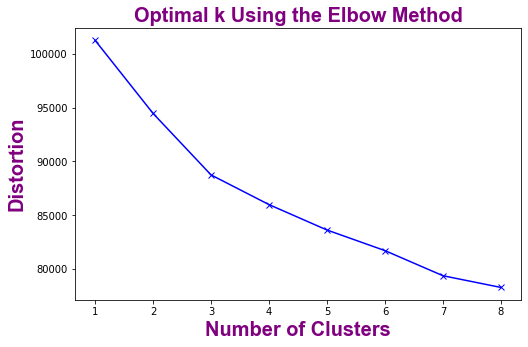

In [13]:
# I'm calling the kmeans_scores function passing it the train_set before pca
# set the number of iterations to 10 
# classify the number of classes by the median this means that 
# if the price is above the median it will have a class of 1 else it will be aassigned 0 
kmeans_scores(train_set, 'SalePrice',num_of_clusters=10, number_classes=2)

## Looking at the results it's not obvious what is the optimal k

# KMeans  With PCA
Elbow visualization, ARI and Silhouette Coefficient

In [14]:
# making a dataframe with only the PCA best features 
pca_train_set=train_set[pca_best_features+['SalePrice']]
pca_train_set.head()

,OverallQual,BsmtQual,TotRmsAbvGrd,2ndFlrSF,SaleType_WD,LandContour_Lvl,ExterCond_TA,YrSold,MasVnrType,MasVnrArea,Heating_GasA,SaleType_COD,RoofStyle_Gable,FireplaceQu,BsmtFullBath,LotShape_IR2,ExterCond_rare,PavedDrive_P,Condition1,Functional,LandContour_Bnk,Street_Pave,Electrical,LowQualFinSF,Id,BsmtHalfBath,BsmtFinSF2,3SsnPorch,Utilities_AllPub,RoofMatl_CompShg,Fence,OpenPorchSF,WoodDeckSF,LotConfig,LotFrontage,KitchenQual_TA,ExterQual_Ex,ExterQual_Gd,HalfBath,HouseStyle,HeatingQC,CentralAir_Y,SalePrice
0,5.724595,0,2.528459,0,0,1,1,2007,0,0,1,0,0,0,0,0,0,0,2,4,0,1,0,0,619,0,0,0,1,1,1,108,0,1,-0.000000,0,1,0,0,4,4,1,8.090351
1,3.575684,0,1.926628,0,1,1,1,2009,0,0,1,0,0,1,0,0,0,0,5,4,0,1,0,0,871,0,0,0,1,1,1,0,0,1,-0.000000,1,0,0,0,4,3,0,7.674949
2,3.575684,0,1.926628,0,1,0,0,2009,0,0,1,0,1,1,1,0,0,0,2,4,0,1,0,0,93,0,0,0,1,1,1,0,0,1,-0.000000,1,0,0,0,4,4,1,7.836626
3,5.216463,0,2.262532,0,1,1,1,2008,0,0,1,0,0,0,1,0,0,0,2,4,0,1,0,0,818,0,0,0,1,1,1,59,150,4,0.125267,0,0,1,0,4,4,1,8.033437
4,4.691018,0,2.105656,0,1,1,1,2006,0,0,1,0,1,0,0,0,0,0,2,4,0,1,0,0,303,0,0,0,1,1,1,81,468,2,-0.000000,0,0,1,0,4,4,1,7.925674


Clusters                       Silhouette Score               Adjusted rand Score           
---------------------------------------------------------------------------------
2                              0.118                          0.715                         
3                              0.119                          0.678                         
4                              0.096                          0.627                         
5                              0.105                          0.6                           
6                              0.092                          0.348                         
7                              0.112                          0.393                         
8                              0.134                          0.527                         
9                              0.069                          0.345                         


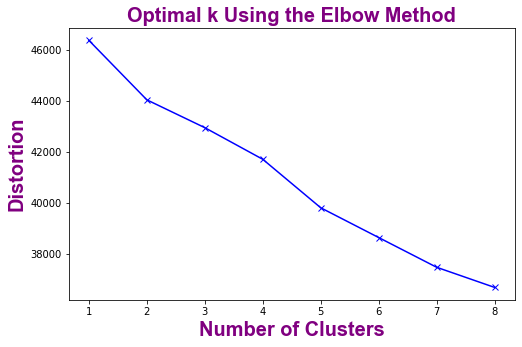

In [15]:
# call kmeans_scores and passing it the pca_train_set dataframe
kmeans_scores(pca_train_set, 'SalePrice',num_of_clusters=10, number_classes=2)

# Hierarchical Clustering
### addapted the function above.

In [16]:
def Agglomerative_Scores(train_set, target, num_of_clusters=6, number_classes=2):
    from sklearn.cluster import AgglomerativeClustering
    from sklearn import metrics
    from sklearn.preprocessing import StandardScaler
    random_state=0
    train_set['target']=pd.qcut(train_set[target],number_classes,labels=False)
    y_train=train_set['target'].to_numpy()
    X_train=train_set.drop(['target',target], axis=1)
    
    scaled_train_set=StandardScaler().fit_transform(train_set) 
    print(
            "{:30.20}".format("Clusters "),
            "{:30.20}".format("Silhouette Score"),
            "{:30.20}".format("Adjusted rand Score"),
        )
    print('-'*81)
    

    for k in range(2, num_of_clusters):
        AC = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(scaled_train_set)
        sil_score = metrics.silhouette_score( scaled_train_set, AC.labels_, metric='euclidean')
        ADJ_rand_score= metrics.adjusted_rand_score( y_train,AC.labels_)

        print(
            "{:30.20}".format(str(k)),
            "{:30.20}".format(str(round(sil_score,3))),
            "{:30.20}".format(str(round(ADJ_rand_score,3))),
        )

# Agglomerative Clustering Without PCA
### ARI and Silhouette Coefficient

In [17]:
Agglomerative_Scores(train_set, 'SalePrice',num_of_clusters=10, number_classes=2)

Clusters                       Silhouette Score               Adjusted rand Score           
---------------------------------------------------------------------------------
2                              0.081                          0.336                         
3                              0.095                          0.276                         
4                              0.109                          0.272                         
5                              0.117                          0.31                          
6                              0.117                          0.304                         
7                              0.07                           0.236                         
8                              0.058                          0.167                         
9                              0.048                          0.16                          


# Agglomerative Clustering With PCA
### ARI and Silhouette Coefficient

In [18]:
Agglomerative_Scores(pca_train_set, 'SalePrice',num_of_clusters=10, number_classes=2)

Clusters                       Silhouette Score               Adjusted rand Score           
---------------------------------------------------------------------------------
2                              0.103                          0.532                         
3                              0.106                          0.524                         
4                              0.096                          0.45                          
5                              0.099                          0.431                         
6                              0.108                          0.427                         
7                              0.107                          0.378                         
8                              0.117                          0.377                         
9                              0.122                          0.377                         


# DBSCAN   Without PCA

note: I manually tried different values for the **eps** parameter of the DBSCAN algorithm to get the number of clusters. I’m different  **eps** for DBSCAN with and without PCA
### addapted the function above.

In [19]:
def DBSCAN_Scores(train_set, target):
    from sklearn.cluster import DBSCAN
    from sklearn.metrics import silhouette_score,adjusted_rand_score
    from sklearn.preprocessing import StandardScaler
    random_state=0
    train_set['target']=pd.qcut(train_set[target],3,labels=False)
    y_train=train_set['target'].to_numpy()
    X_train=train_set.drop(['target',target], axis=1)
    
    scaled_train_set=StandardScaler().fit_transform(train_set) 
    print(
            "{:30.20}".format("Clusters "),
            "{:30.20}".format("Silhouette Score"),
            "{:30.20}".format("Adjusted rand Score"),
        )
    print('-'*81)
    
    db = DBSCAN(eps=34, min_samples=1)
    clusters=db.fit_predict(scaled_train_set)
  

    sil_score = silhouette_score(y_train.reshape(-1, 1), clusters)
    sc = adjusted_rand_score(y_train,clusters)


    print(
        "{:30.20}".format(str(2)),
        "{:30.20}".format(str(round(sil_score,3))),
        "{:30.20}".format(str(round(sc,4))),
    )
   
DBSCAN_Scores(train_set, 'SalePrice')

Clusters                       Silhouette Score               Adjusted rand Score           
---------------------------------------------------------------------------------
2                              -0.67                          0.0                           


# DBSCAN   With PCA
### addapted the function above.

In [20]:
def DBSCAN_Scores(train_set, target):
    from sklearn.cluster import DBSCAN
    from sklearn.metrics import silhouette_score,adjusted_rand_score
    from sklearn.preprocessing import StandardScaler
    random_state=0
    train_set['target']=pd.qcut(train_set[target],3,labels=False)
    y_train=train_set['target'].to_numpy()
    X_train=train_set.drop(['target',target], axis=1)
    
    scaled_train_set=StandardScaler().fit_transform(train_set) 
    print(
            "{:30.20}".format("Clusters "),
            "{:30.20}".format("Silhouette Score"),
            "{:30.20}".format("Adjusted rand Score"),
        )
    print('-'*81)

    db = DBSCAN(eps=3, min_samples=1)
    clusters=db.fit_predict(scaled_train_set)
    


    sil_score = silhouette_score(y_train.reshape(-1, 1), clusters)
    sc = adjusted_rand_score(y_train,clusters)


    print(
        "{:30.20}".format(str(2)),
        "{:30.20}".format(str(round(sil_score,3))),
        "{:30.20}".format(str(round(sc,4))),
    )
   
DBSCAN_Scores(pca_train_set, 'SalePrice')

Clusters                       Silhouette Score               Adjusted rand Score           
---------------------------------------------------------------------------------
2                              -0.396                         0.0056                        


In [ ]:
Thank You